# Building a Convolutional Neural Network on CIFAR 10 Dataset

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

The Challenge here for the model is extreme low resolutions of the images

## Library imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(f"Using Tensorflow version as -{tf.__version__}")

Using Tensorflow version as -2.9.1


In [2]:
# Note this code is only valid if GPU is being used for training

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


## Load the dataset

In [3]:
# we will load the dataset from tensorflow keras datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Check the shape of the respective sets
print(f"Shape of training features - {X_train.shape}")
print(f"Shape of testing featires - {X_test.shape}")
print(f"Training target shape - {y_train.shape}")
print(f"Testing target shape - {y_test.shape}")

Shape of training features - (50000, 32, 32, 3)
Shape of testing featires - (10000, 32, 32, 3)
Training target shape - (50000, 1)
Testing target shape - (10000, 1)


## Data Visualizations

Label of the 50th image - [5]


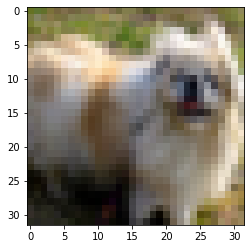

In [4]:
# We will check the 40th image
plt.imshow(X_train[40])
print(f"Label of the 50th image - {y_train[40]}")

c:\Users\SuvoB\.conda\envs\tensorflow-gpu\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


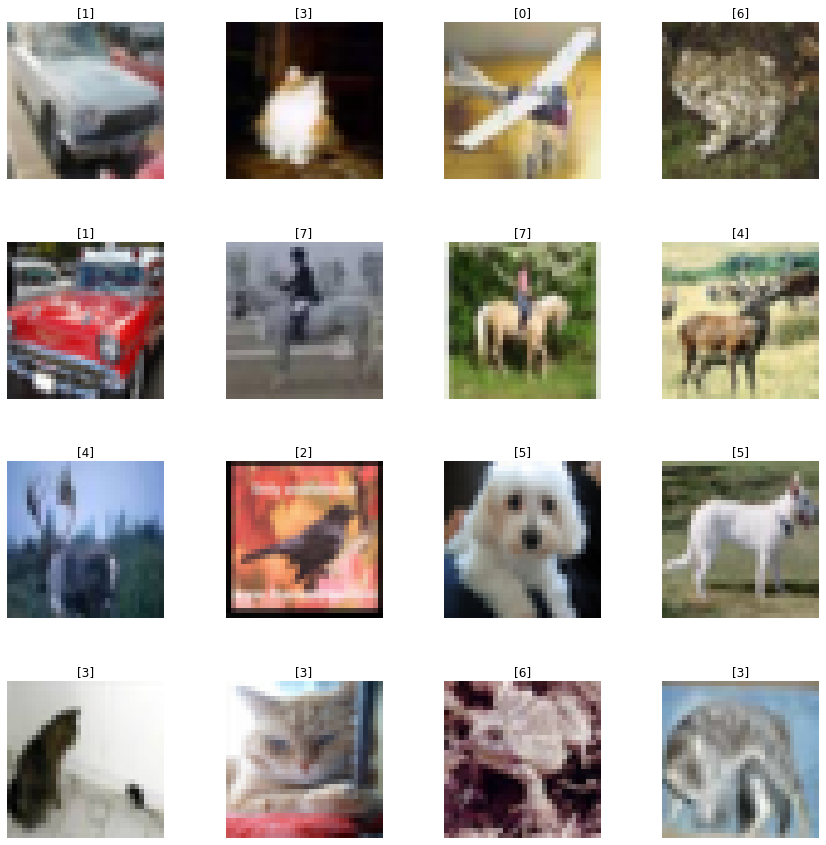

In [5]:
# Lets view some 16 images

W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

## Data Preparation for CNN

In [6]:
# we will need to convert the data types of training and testing to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
# Normalize the features
X_train = X_train/255
X_test = X_test/255

In [8]:
# In Order to use Categorical cross entropy we need to convert the target variable to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
# Quick check on the training feature
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [10]:
# Check on the target variable
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Build and Train the Model

In [11]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.keras.activations.relu, input_shape=X_train.shape[1:]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.keras.activations.relu))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(tf.keras.layers.Dropout(rate=0.2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.keras.activations.relu))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.keras.activations.relu))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(tf.keras.layers.Dropout(rate=0.2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1024, activation=tf.keras.activations.relu))
cnn.add(tf.keras.layers.Dropout(rate=0.2))
cnn.add(tf.keras.layers.Dense(units=1024, activation=tf.keras.activations.relu))

cnn.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# Check the model summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

c:\Users\SuvoB\.conda\envs\tensorflow-gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
# Train the model
epochs_hist = cnn.fit(X_train, y_train, epochs=100, batch_size=512, validation_split=0.1)

Epoch 1/100
88/88 [==============================] - 5s 27ms/step - loss: 2.0749 - accuracy: 0.2240 - val_loss: 1.8260 - val_accuracy: 0.3300
Epoch 2/100
88/88 [==============================] - 2s 20ms/step - loss: 1.7393 - accuracy: 0.3692 - val_loss: 1.6354 - val_accuracy: 0.3992
Epoch 3/100
88/88 [==============================] - 2s 20ms/step - loss: 1.6071 - accuracy: 0.4136 - val_loss: 1.5327 - val_accuracy: 0.4448
Epoch 4/100
88/88 [==============================] - 2s 20ms/step - loss: 1.5190 - accuracy: 0.4456 - val_loss: 1.4324 - val_accuracy: 0.4732
Epoch 5/100
88/88 [==============================] - 2s 20ms/step - loss: 1.4462 - accuracy: 0.4742 - val_loss: 1.3923 - val_accuracy: 0.4890
Epoch 6/100
88/88 [==============================] - 2s 20ms/step - loss: 1.3957 - accuracy: 0.4942 - val_loss: 1.3528 - val_accuracy: 0.5050
Epoch 7/100
88/88 [==============================] - 2s 20ms/step - loss: 1.3515 - accuracy: 0.5144 - val_loss: 1.3027 - val_accuracy: 0.5300
Epoch 

## Evaluate the Model

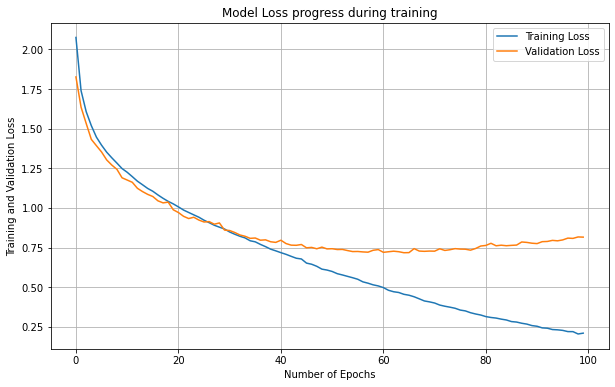

In [13]:
# Visualize the Model Loss
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title("Model Loss progress during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Loss")
plt.legend(['Training Loss', 'Validation Loss'])

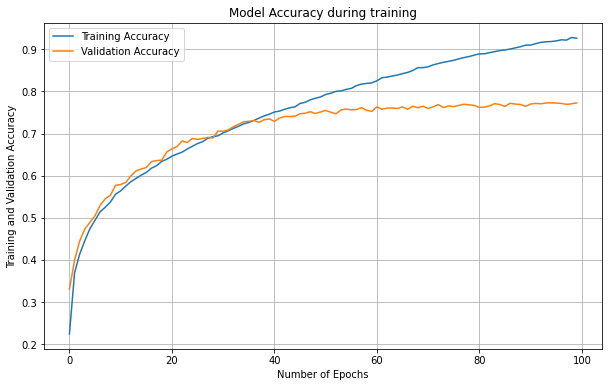

In [14]:
# Visualize the Model Accuracy
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(epochs_hist.history['accuracy'])
plt.plot(epochs_hist.history['val_accuracy'])
plt.title("Model Accuracy during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Accuracy")
plt.legend(['Training Accuracy', 'Validation Accuracy'])

In [15]:
# We will run predictions using this model and come up with the test accuracy
evaluations = cnn.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy is - {evaluations[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.8594 - accuracy: 0.7552
Test Accuracy is - 0.7552000284194946


In [16]:
# Now we will need to get predictions on the test data
predictions = cnn.predict(X_test)
prediction_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 3ms/step


In [20]:
# Convert back to labels from categories matrix for the actual target labels
y_test = y_test.argmax(axis=1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [21]:
print('Confusion Matrix')
print(confusion_matrix(y_test, prediction_classes))
print("\n")
print("Accuracy Score")
print(accuracy_score(y_test, prediction_classes))
print("\n")
print("Classification Report")
print(classification_report(y_test, prediction_classes))

Confusion Matrix
[[801  29  16  16  19   6  13   9  55  36]
 [ 12 887   4   5   1   4   9   2  21  55]
 [ 69   4 597  58  76  60  74  37  12  13]
 [ 19  11  52 572  53 165  61  29  16  22]
 [ 15   3  44  78 688  38  66  53  13   2]
 [ 11   9  20 181  51 648  26  36   8  10]
 [  9   6  21  41  22  12 877   4   5   3]
 [ 12   3  11  47  47  47   7 803   3  20]
 [ 47  39  12  14   5   7   7   3 840  26]
 [ 25  74   6  13   2   3   4  14  20 839]]


Accuracy Score
0.7552


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1000
           1       0.83      0.89      0.86      1000
           2       0.76      0.60      0.67      1000
           3       0.56      0.57      0.56      1000
           4       0.71      0.69      0.70      1000
           5       0.65      0.65      0.65      1000
           6       0.77      0.88      0.82      1000
           7       0.81      0.80      0.81      1000
           8     

<AxesSubplot:>

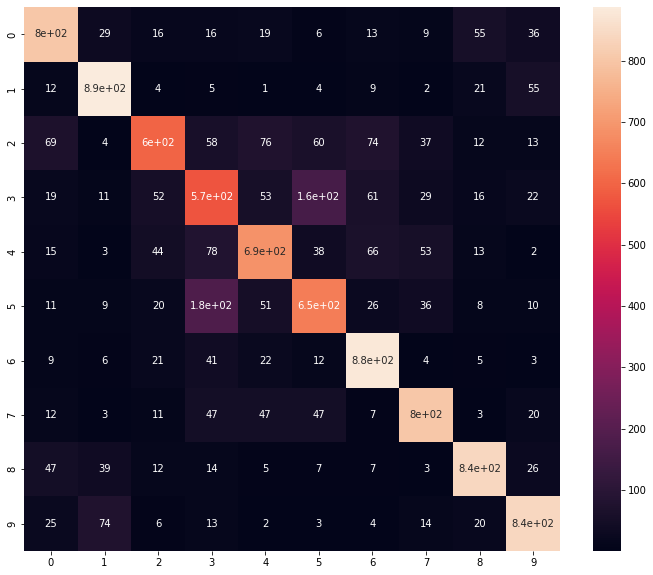

In [23]:
# Visual representation of Confusion Matrix

plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, prediction_classes)
sns.heatmap(cm, annot=True)